# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
!pip install citipy

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
temp_units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={temp_units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=8f280fa2172c0cd714c9e029307f27f0&units=imperial&q='

In [5]:
#Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []


#Starter item number for looping
num = 1

print(f"Beginning Data Retrieval")
print(f"-------------------------------")


for city in cities:  

# Writing into the lists different weather data for each city     
    try: 
        response = requests.get(query_url + city).json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {num} | {city_record}")
             
        num = num + 1    

        time.sleep(1.01)
        
    except:
        print("City not found. Skipping...")
    continue
print(f"-----------------------------")
print(f"Data Retrieval Complete")      
print(f"-----------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Cherskiy
Processing Record 2 | Changtu
Processing Record 3 | Khatanga
Processing Record 4 | Saskylakh
Processing Record 5 | Kaitangata
Processing Record 6 | Sorong
Processing Record 7 | Thompson
Processing Record 8 | Lavrentiya
Processing Record 9 | College
Processing Record 10 | Gaya
Processing Record 11 | Avarua
Processing Record 12 | Jamestown
Processing Record 13 | Rikitea
Processing Record 14 | Busselton
Processing Record 15 | Fendou
Processing Record 16 | Qaanaaq
Processing Record 17 | Mar del Plata
Processing Record 18 | Ushuaia
Processing Record 19 | Vaini
Processing Record 20 | Kavieng
Processing Record 21 | Cayenne
Processing Record 22 | Vanavara
Processing Record 23 | Tiksi
Processing Record 24 | Correntina
Processing Record 25 | Ketchikan
Processing Record 26 | Tilbury
Processing Record 27 | Berekum
City not found. Skipping...
Processing Record 28 | Icatu
Processing Record 29 | Khovd
Processing R

Processing Record 234 | Solnechnyy
Processing Record 235 | Nanortalik
Processing Record 236 | Kawalu
Processing Record 237 | Dikson
Processing Record 238 | Fortuna
Processing Record 239 | Taksimo
Processing Record 240 | The Valley
Processing Record 241 | Muyezerskiy
Processing Record 242 | Korla
Processing Record 243 | Zapolyarnyy
Processing Record 244 | Fredericksburg
Processing Record 245 | Strenci
Processing Record 246 | Ilulissat
Processing Record 247 | Kahului
Processing Record 248 | Lagoa
Processing Record 249 | Bukavu
Processing Record 250 | Aklavik
City not found. Skipping...
Processing Record 251 | Mangai
Processing Record 252 | Hailar
Processing Record 253 | Hithadhoo
City not found. Skipping...
Processing Record 254 | Cabo San Lucas
Processing Record 255 | Longkou
Processing Record 256 | Jaisalmer
Processing Record 257 | Shagonar
Processing Record 258 | Lebu
Processing Record 259 | Leningradskiy
Processing Record 260 | Kruisfontein
Processing Record 261 | Simao
Processing Re

Processing Record 465 | Menongue
Processing Record 466 | Sungairaya
Processing Record 467 | Ancud
Processing Record 468 | Kolokani
Processing Record 469 | Yumen
Processing Record 470 | Paamiut
Processing Record 471 | Cap-aux-Meules
Processing Record 472 | Tommot
Processing Record 473 | İstisu
Processing Record 474 | Vytegra
Processing Record 475 | Atar
Processing Record 476 | Honiara
Processing Record 477 | Amoy
Processing Record 478 | Galesong
Processing Record 479 | Tavricheskoye
Processing Record 480 | Salekhard
Processing Record 481 | Zarasai
Processing Record 482 | Oodweyne
Processing Record 483 | Sambava
Processing Record 484 | Ixtapa
Processing Record 485 | Auki
Processing Record 486 | Radesti
Processing Record 487 | Labuhan
City not found. Skipping...
Processing Record 488 | Aksarka
Processing Record 489 | Kieta
Processing Record 490 | Yulara
Processing Record 491 | Shelekhov
Processing Record 492 | Lazarev
Processing Record 493 | Zhongxing
Processing Record 494 | Shirokiy
Proc

In [6]:
# Create a dictonary with the lists generated
weather = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng" : lng, 
    "Max Temp" : max_temp,
    "Wind Speed":wind_speed
}

# Create a dataframe from dictionary
weather_df = pd.DataFrame(weather)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Save dataframe to CSV
weather_df.to_csv('weather_data.csv')

# Display dataframe head 
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cherskiy,0,RU,1580528897,98,68.75,161.30,-29.58,4.12
1,Changtu,0,CN,1580528899,81,42.78,124.10,11.73,4.97
2,Khatanga,0,RU,1580528900,97,71.97,102.50,-33.97,6.82
3,Saskylakh,100,RU,1580528901,97,71.92,114.08,-24.20,8.66
4,Kaitangata,100,NZ,1580528644,65,-46.28,169.85,65.52,22.28


In [8]:
# Display count of weather data values 
weather_df.count()

City          567
Cloudiness    567
Country       567
Date          567
Humidity      567
Lat           567
Lng           567
Max Temp      567
Wind Speed    567
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

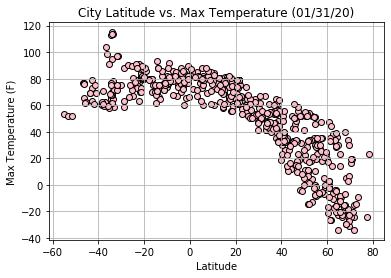

In [11]:
# Creating a scatter plot
latitude = weather_df["Lat"]
temperature = weather_df["Max Temp"]
plt.scatter(latitude, temperature, marker="o", facecolors="pink", edgecolors="black")
plt.title("City Latitude vs. Max Temperature (01/31/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
# Adding grid
plt.grid(True)
# Saving a *.png file
plt.savefig("Figures/Latitude_vs_Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

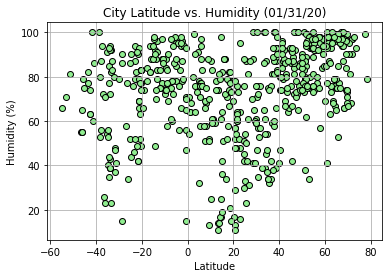

In [12]:
humidity = weather_df["Humidity"]
plt.scatter(latitude, humidity, marker="o", facecolors="lightgreen", edgecolors="black")
plt.title("City Latitude vs. Humidity (01/31/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("Figures/Latitude_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

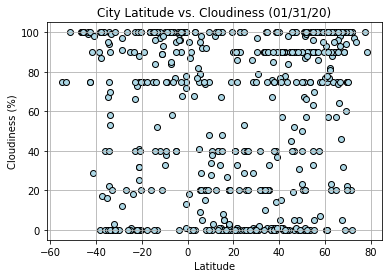

In [13]:
cloudiness = weather_df["Cloudiness"]
plt.scatter(latitude, cloudiness, marker="o", facecolors="lightblue", edgecolors="black")
plt.title("City Latitude vs. Cloudiness (01/31/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("Figures/Latitude_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

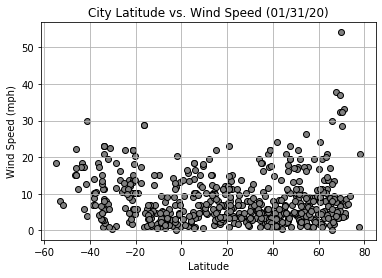

In [15]:
wind_speed = weather_df["Wind Speed"]
plt.scatter(latitude, wind_speed, marker="o", facecolors="grey", edgecolors="black")
plt.title("City Latitude vs. Wind Speed (01/31/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("Figures/Latitude_vs_Wind_Speed.png")
plt.show()

## Linear Regression

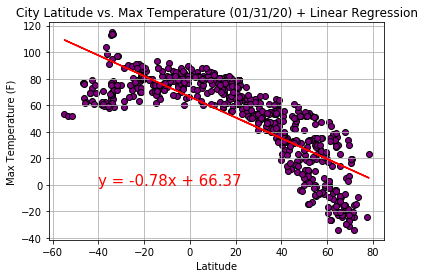

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots
x_values = weather_df["Lat"]
y_values = weather_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values,facecolors="purple",edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-40,0), fontsize=15,color="red")

plt.title("City Latitude vs. Max Temperature (01/31/20) + Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("Figures/Linear_Regression.png")
plt.show()

In [19]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemispere_df = weather_df[weather_df["Lat"] >= 0]
northern_hemispere_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cherskiy,0,RU,1580528897,98,68.75,161.30,-29.58,4.12
1,Changtu,0,CN,1580528899,81,42.78,124.10,11.73,4.97
2,Khatanga,0,RU,1580528900,97,71.97,102.50,-33.97,6.82
3,Saskylakh,100,RU,1580528901,97,71.92,114.08,-24.20,8.66
6,Thompson,90,CA,1580528864,92,55.74,-97.86,23.00,6.93
...,...,...,...,...,...,...,...,...,...
558,Taber,40,CA,1580529490,74,49.82,-112.15,41.00,8.05
561,Bollnaes,100,SE,1580529717,98,61.35,16.39,33.01,1.01
562,Shenjiamen,0,CN,1580529719,59,29.96,122.30,46.44,5.41
564,Riyadh,29,SA,1580529568,30,24.69,46.72,59.00,6.93


In [20]:
southern_hemispere_df = weather_df[weather_df["Lat"] <= 0]
southern_hemispere_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
4,Kaitangata,100,NZ,1580528644,65,-46.28,169.85,65.52,22.28
5,Sorong,1,ID,1580528904,47,-0.88,131.25,89.92,7.74
10,Avarua,41,CK,1580528911,78,-21.21,-159.78,82.40,5.82
12,Rikitea,100,PF,1580528914,79,-23.12,-134.97,79.14,13.82
13,Busselton,0,AU,1580528916,23,-33.65,115.33,78.01,8.59
...,...,...,...,...,...,...,...,...,...
553,Kensington,0,AU,1580529705,39,-33.92,151.22,114.01,23.04
559,Inhambane,18,MZ,1580529285,76,-23.86,35.38,77.68,10.00
560,Mount Gambier,100,AU,1580529427,87,-37.83,140.77,60.80,10.29
563,Parana,0,AR,1580529675,47,-31.73,-60.52,75.00,1.01


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

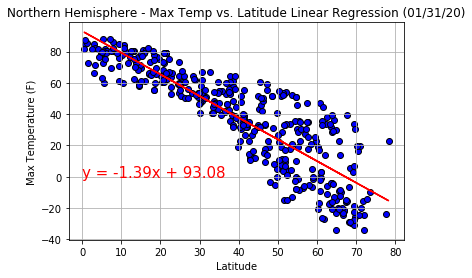

The r-squared is: -0.8690321503206104


In [30]:
x_values = northern_hemispere_df["Lat"]
y_values = northern_hemispere_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,facecolors="blue",edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (0,0), fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression (01/31/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("Figures/Northern_Hemisphere_Max_Temp_vs_Latitude_Linear_Regression.png")
plt.show()
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

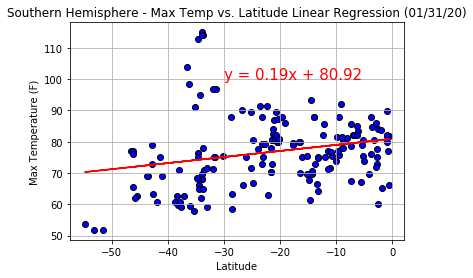

The r-squared is: 0.23711418688496944


In [29]:
x_values = southern_hemispere_df["Lat"]
y_values = southern_hemispere_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,facecolors="blue",edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-30,100), fontsize=15,color="red")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression (01/31/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.savefig("Figures/Southern_Hemisphere_Max_Temp_vs_Latitude_Linear_Regression.png")
plt.show()
print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [27]:
northern_hemispere_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cherskiy,0,RU,1580528897,98,68.75,161.30,-29.58,4.12
1,Changtu,0,CN,1580528899,81,42.78,124.10,11.73,4.97
2,Khatanga,0,RU,1580528900,97,71.97,102.50,-33.97,6.82
3,Saskylakh,100,RU,1580528901,97,71.92,114.08,-24.20,8.66
6,Thompson,90,CA,1580528864,92,55.74,-97.86,23.00,6.93


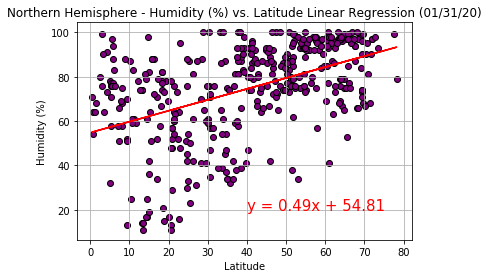

The r-squared is: 0.46883233085678094


In [34]:
x_values = northern_hemispere_df["Lat"]
y_values = northern_hemispere_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,facecolors="purple",edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (40,20), fontsize=15,color="red")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression (01/31/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("Figures/Northern_Hemisphere_Humidity_vs_Latitude_Linear_Regression.png")
plt.show()
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

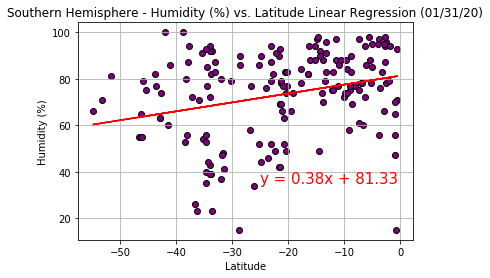

The r-squared is: 0.2766540410069031


In [35]:
x_values = southern_hemispere_df["Lat"]
y_values = southern_hemispere_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,facecolors="purple",edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-25,35), fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression (01/31/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("Figures/Southern_Hemisphere_Humidity_vs_Latitude_Linear_Regression.png")
plt.show()
print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

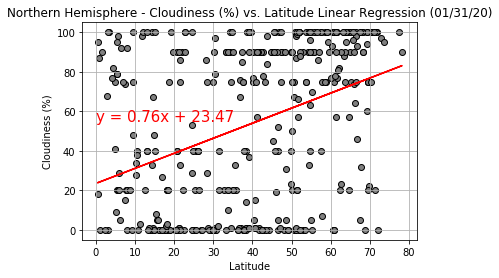

The r-squared is: 0.3782186908486404


In [38]:
x_values = northern_hemispere_df["Lat"]
y_values = northern_hemispere_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,facecolors="grey",edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (0,55), fontsize=15,color="red")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (01/31/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("Figures/Northern_Hemisphere_Cloudiness_vs_Latitude_Linear_Regression.png")
plt.show()
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

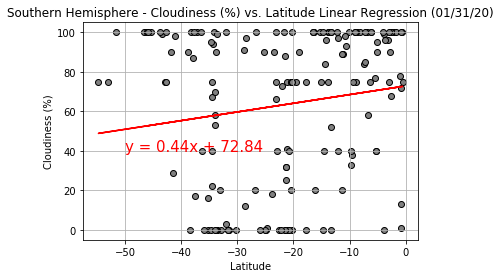

The r-squared is: 0.15368050876125133


In [40]:
x_values = southern_hemispere_df["Lat"]
y_values = southern_hemispere_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,facecolors="grey",edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-50,40), fontsize=15,color="red")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression (01/31/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("Figures/Southern_Hemisphere_Cloudiness_vs_Latitude_Linear_Regression.png")
plt.show()
print(f"The r-squared is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

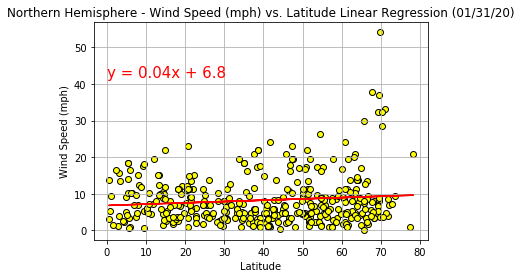

The r-squared is: 0.10724295212071307


In [44]:
x_values = northern_hemispere_df["Lat"]
y_values = northern_hemispere_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,facecolors="yellow",edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (0,42), fontsize=15,color="red")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (01/31/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("Figures/Northern_Hemisphere_Wind_Speed_vs_Latitude_Linear_Regression.png")
plt.show()
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

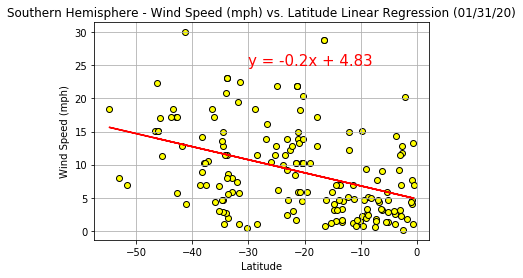

The r-squared is: -0.39978134323921405


In [48]:
x_values = southern_hemispere_df["Lat"]
y_values = southern_hemispere_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,facecolors="yellow",edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-30,25), fontsize=15,color="red")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression (01/31/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("Figures/Southern_Hemisphere_Wind_Speed_vs_Latitude_Linear_Regression.png")
plt.show()
print(f"The r-squared is: {rvalue}")